# TLS with QuTIP

In [1]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
import scipy

%matplotlib widget

#### Hamiltoniano del sistema en la base $|L\rangle, |R\rangle$
$H= \begin{pmatrix}
        \delta/2 & \tau \\
        \tau & -\delta/2
    \end{pmatrix}$

In [2]:
# creación del Hamiltoniano del TLS
def hamiltonian_creator(epsL, epsR, tau):

    Hz = delta/2*qutip.sigmaz()
    Hx = tau*qutip.sigmax()

    H = Hz+Hx
    
    return H

In [3]:
epsL = 2
epsR = 1
tau = 1

delta = 1/(epsR-epsL)

H = hamiltonian_creator(epsL, epsR, tau)
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.5  1. ]
 [ 1.   0.5]]

In [4]:
L = qutip.basis(2,0)
R = qutip.basis(2,1)
psi0 = L
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [5]:
t = np.linspace(0, 10, 100)

states = qutip.sesolve(H, psi0, t).states

pLs = []
pRs = []
for state in states:
    pLs.append(np.abs(L.overlap(state))**2)
    pRs.append(np.abs(R.overlap(state))**2)

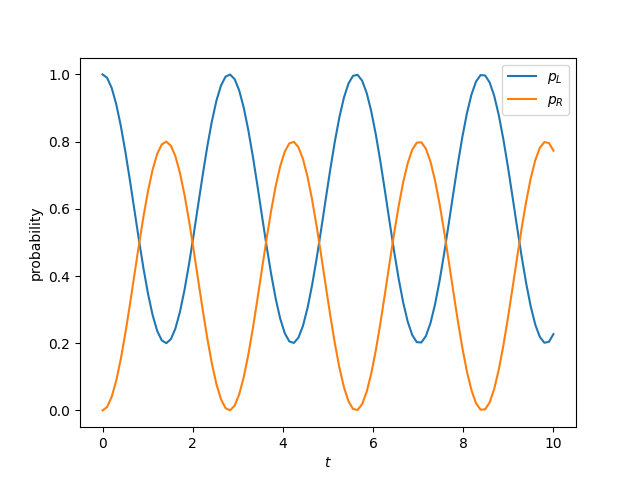

In [6]:
fig, ax = plt.subplots()

ps = [pLs, pRs]

for pi in ps:
    ax.plot(t, pi)

ax.set_xlabel(r'$t$')
ax.set_ylabel('probability')
ax.legend((r'$p_L$', r'$p_R$'), prop = {'size': 10}, loc='upper right')